In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the coefficients and importances from the CSV files
lr_coefficients_df = pd.read_csv('lr_coefficients.csv')
rf_importances_df = pd.read_csv('rf_importances.csv')

In [3]:
# Find common features between both models
common_features = list(set(lr_coefficients_df['feature']).intersection(rf_importances_df['feature']))

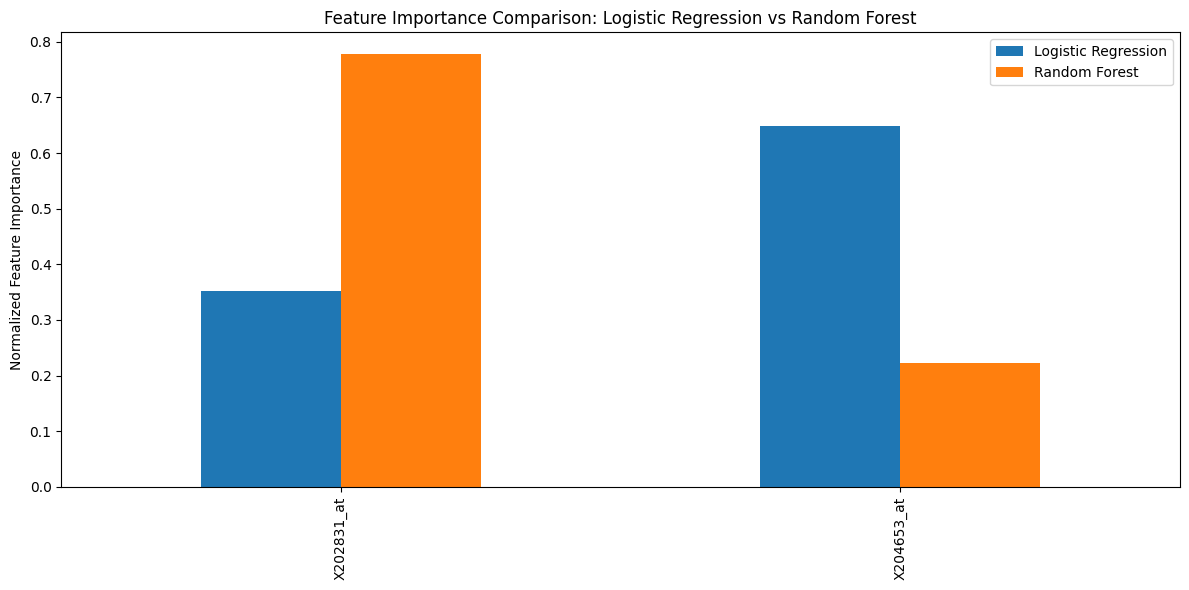

In [4]:
# Find common features between both models
common_features = list(set(lr_coefficients_df['feature']).intersection(rf_importances_df['feature']))

# Filter the dataframes to have only common features
lr_coefficients_df = lr_coefficients_df[lr_coefficients_df['feature'].isin(common_features)]
rf_importances_df = rf_importances_df[rf_importances_df['feature'].isin(common_features)]

# Normalize the logistic regression coefficients and random forest feature importances
lr_coeff_normalized = np.abs(lr_coefficients_df['coefficient']) / np.sum(np.abs(lr_coefficients_df['coefficient']))
rf_feature_importances_normalized = rf_importances_df['importance'] / np.sum(rf_importances_df['importance'])

# Create a DataFrame with the common features as the index
feature_importances_df = pd.DataFrame(
    {
        'Logistic Regression': lr_coeff_normalized.values,
        'Random Forest': rf_feature_importances_normalized.values
    },
    index=common_features
)

# Sort the DataFrame by the average importance of both models
feature_importances_df['Average'] = feature_importances_df.mean(axis=1)
feature_importances_df = feature_importances_df.sort_values(by='Average', ascending=False)

# Plot the comparison
ax = feature_importances_df[['Logistic Regression', 'Random Forest']].plot.bar(rot=90, figsize=(12, 6))
ax.set_ylabel('Normalized Feature Importance')
ax.set_title('Feature Importance Comparison: Logistic Regression vs Random Forest')
plt.tight_layout()
plt.show()